<a href="https://colab.research.google.com/github/Sara-Esm/Natural-Language-Processing-NLP-and-generative-AI/blob/main/4_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoders


Design and train a simple autoencoder using the MNIST dataset. The model encodes and decodes input images, generating reconstructions that can be compared to the originals.

In [12]:
## Import Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras.datasets import mnist
from keras.models import Model
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [13]:
## Load and Preprocess the MNIST Dataset

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

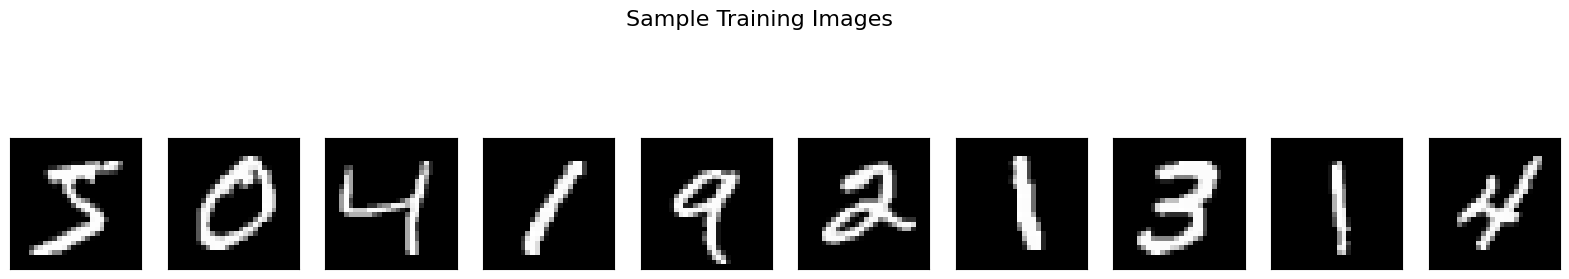

In [14]:
# Display some training images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Sample Training Images", fontsize=16)
plt.show()

In [15]:
## Build model

# Input layer
input_img = layers.Input(shape=(784,))

# Encoder
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
## Compile and Train the Model

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.3436 - val_loss: 0.1686
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1604 - val_loss: 0.1378
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1356 - val_loss: 0.1252
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1253 - val_loss: 0.1185
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1182 - val_loss: 0.1117
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1122 - val_loss: 0.1089
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1090 - val_loss: 0.1056
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1060 - val_loss: 0.1028
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1034 - val_loss: 0.1010
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1018 - val_loss: 0.0999
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1008 - val_loss: 0.0986
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

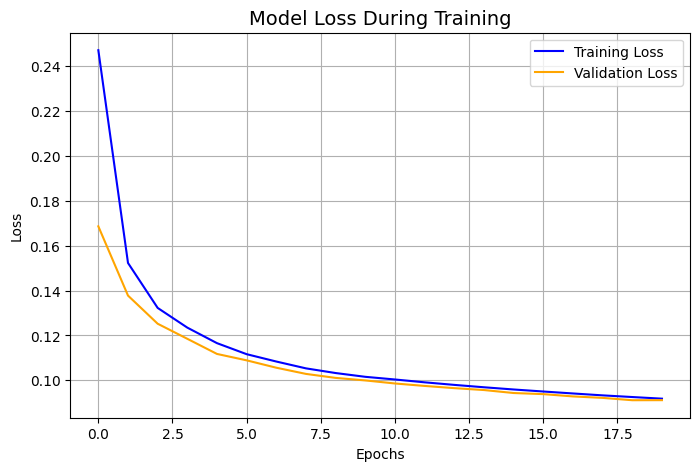

In [17]:
## Visualize Training Performance

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss During Training', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


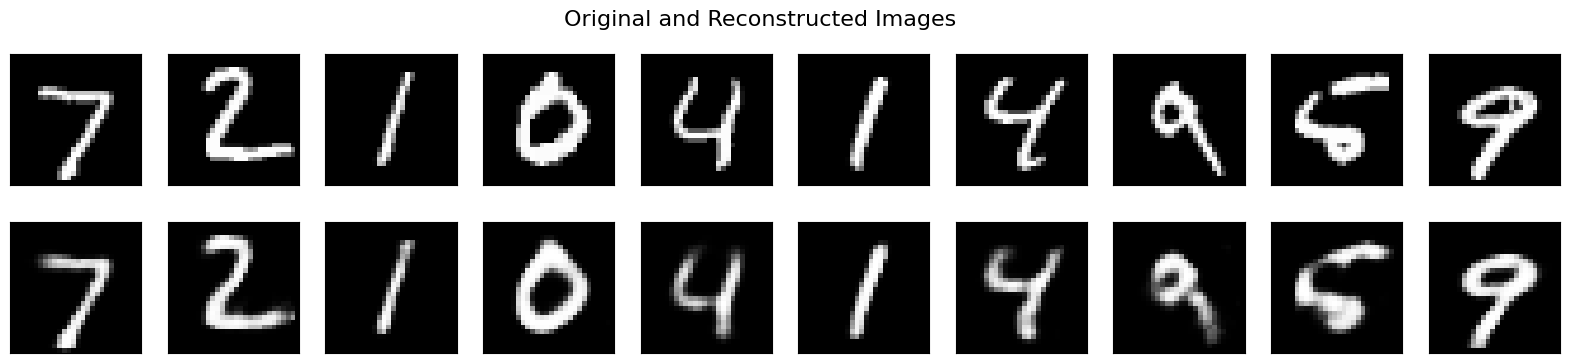

In [18]:
## Generate Reconstructions

# Generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Original and Reconstructed Images", fontsize=16)
plt.show()